# Home Credit Score Card

In this notebook, the objective is to make a model to predit the ability of customers to make repayments. The data used is HCI Credit Score Dataset by Home Credit Indonesia.

## Import Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import xgboost as xgb

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

## Data Cleansing and Analysis

In [3]:
df_train.shape

(307511, 122)

This data has 307511 rows and 122 columns. We will check if the datatype of each column is correct.

In [4]:
#checking datatypes
pd.set_option('display.max_rows',None)
df_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Next, we will see if the data has any missing values.

In [5]:
def show_missing(df):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum()/len(df[item])) * 100, 2))
        
    output = pd.DataFrame({
        'variable' : variables,
        'dtype' : dtypes,
        'count' : count,
        'unique' : unique,
        'missing' : missing,
        'pc_missing' : pc_missing
    })
    
    return output

In [6]:
pd.set_option('display.max_rows',None)
show_missing(df_train)

,variable,dtype,count,unique,missing,pc_missing
0,SK_ID_CURR,int64,307511,307511,0,0.00
1,TARGET,int64,307511,2,0,0.00
2,NAME_CONTRACT_TYPE,object,307511,2,0,0.00
3,CODE_GENDER,object,307511,3,0,0.00
4,FLAG_OWN_CAR,object,307511,2,0,0.00
5,FLAG_OWN_REALTY,object,307511,2,0,0.00
6,CNT_CHILDREN,int64,307511,15,0,0.00
7,AMT_INCOME_TOTAL,float64,307511,2548,0,0.00
8,AMT_CREDIT,float64,307511,5603,0,0.00
9,AMT_ANNUITY,float64,307511,13673,12,0.00


The columns with high missing values are the columns about the description of the customers' house. We will remove these columns, because too much data is missing.

In [7]:
#drop columns with >50% missing values
limitPer = len(df_train)*.47
df_train =  df_train.dropna(thresh=limitPer, axis=1)

In [8]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The `OCCUPATION_TYPE` column still has 35% missing values. But we see that this column can be represent by `NAME_INCOME_TYPE` column. First, I will show how likely the customers to make repayments based on their occupations.

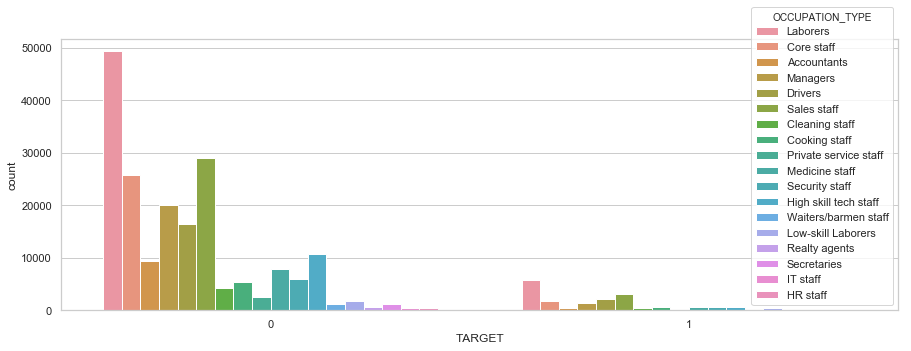

In [9]:
fig = plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data = df_train, x='TARGET', hue = 'OCCUPATION_TYPE')
plt.show()

In [10]:
pd.crosstab(df_train['OCCUPATION_TYPE'],df_train['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1)

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,95.169673,4.830327
Cleaning staff,90.393295,9.606705
Cooking staff,89.556004,10.443996
Core staff,93.696046,6.303954
Drivers,88.673870,11.326130
HR staff,93.605684,6.394316
High skill tech staff,93.840070,6.159930
IT staff,93.536122,6.463878
Laborers,89.421230,10.578770


As we can see in the bar chart, the ratio between each occupation in the customers who can make repayment and not are stable. But the percent between the safe (can make repayment) and problematic (struggle to repay) customers are different. From all of the low skill laborers customers, 83% can make repayment while 17% can't. The top three customers' occupation with highest percent of safe customers are accountant, high-skill tech staff, and managers. But, the application made by the customers who has these occupation are low. So, the company should make an ad for these occupation workers to make credit applications.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

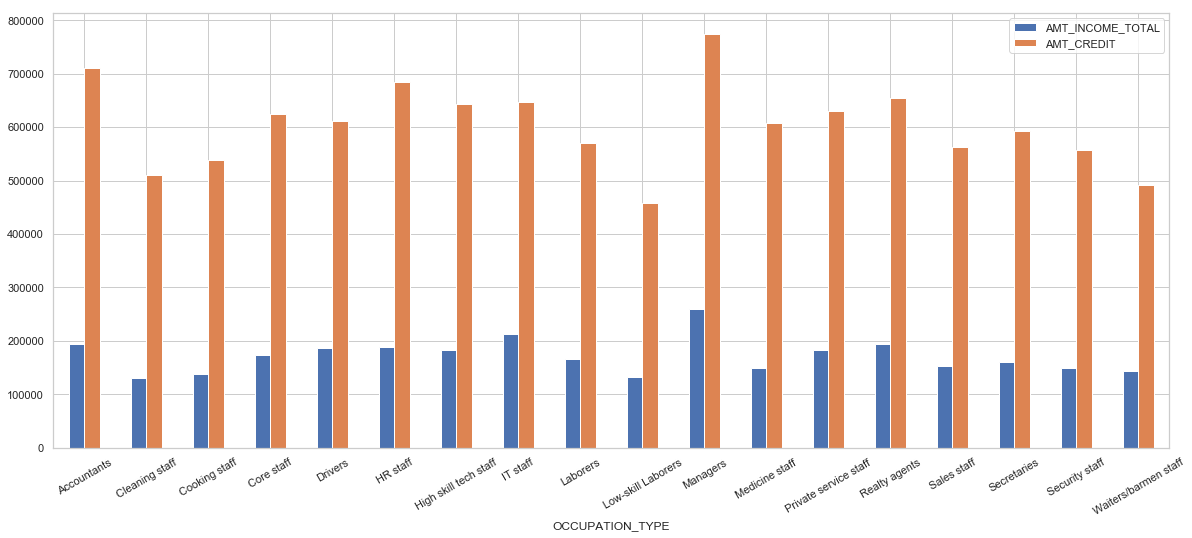

In [11]:
df_train.groupby('OCCUPATION_TYPE')[['AMT_INCOME_TOTAL','AMT_CREDIT']].mean().plot(kind = 'bar', figsize = (20,8))
plt.xticks(rotation=30, horizontalalignment="center")

From the chart above, we could see that the amount of credit is linear with the amount of income, despite of their occupations. Managers and Accountants have highest mean of income.

In [12]:
df_train = df_train.drop('OCCUPATION_TYPE',axis=1)

In [13]:
df_train = df_train.dropna()

In [14]:
df_train.duplicated().sum()

0

We will now see the what factors are affecting the column `TARGET`. First, we will see the background of the customers.

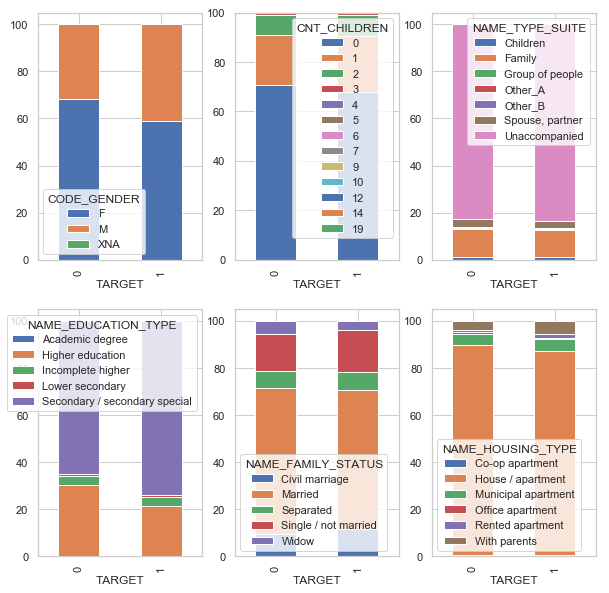

In [16]:
fig, axs = plt.subplots(2,3,figsize=(10,10))

pd.crosstab(df_train['TARGET'], df_train['CODE_GENDER']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][0],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['CNT_CHILDREN']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][1],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['NAME_TYPE_SUITE']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][2],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['NAME_EDUCATION_TYPE']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][0],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['NAME_FAMILY_STATUS']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][1],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['NAME_HOUSING_TYPE']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][2],kind = 'bar', stacked = True)

As we can see above, female customers who can make repayments are higher than male but male customers who fail to make repayments are higher than the female customers. We will analyze what affecting this.

In [17]:
df_train['CODE_GENDER'].value_counts()

F      76917
M      36963
XNA        3
Name: CODE_GENDER, dtype: int64

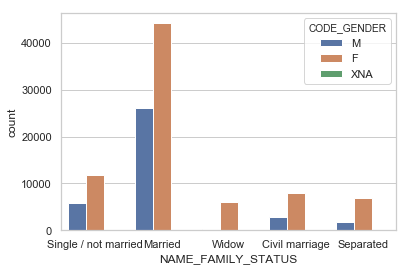

In [18]:
fig = plt.figure()  
ax = sns.countplot(data = df_train, x='NAME_FAMILY_STATUS',hue = 'CODE_GENDER')
plt.show() 

So, we can see that female customers are more than male customers, despite of the marital status. We also see that married women are the highest number of customers. We will analyze the age of the applicants by make an `AGE` column based on `DAYS_BIRTH`

In [19]:
df_train['AGE'] = df_train['DAYS_BIRTH'].apply(lambda x: round(x*(-1)/365))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000033EAB400>,
      dtype=object)

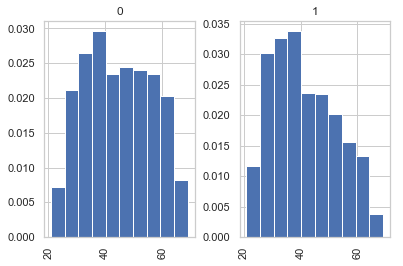

In [20]:
df_train['AGE'].hist(by=df_train['TARGET'],density=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000033EA6BA8>,
      dtype=object)

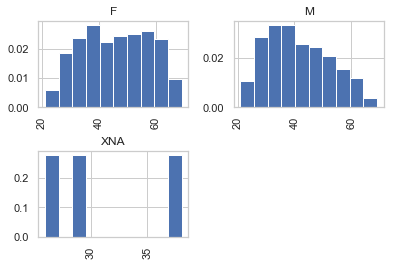

In [21]:
df_train['AGE'].hist(by=df_train['CODE_GENDER'],density=True)

As we can see above, people around the age of 20-40 are having more problematic customers than the safe one. And the higher the age, female customers are still having a high applications, but the male customers didn't. So, the company also can make an ad targeting male around 40 - 60.

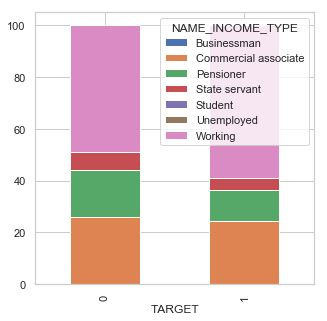

In [22]:
pd.crosstab(df_train['TARGET'], df_train['NAME_INCOME_TYPE']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True,figsize=(5,5))

Based on the bar above, we can see that working class people who were problematic are more than the working class people who were not. Whereas, there are more pensioners who can make repayment than who can't. Maybe, this is because pensioner has a stable income.

There are a lot Flag Document columns. To simplify it, i will make a column which is the sum of all the flag document columns.

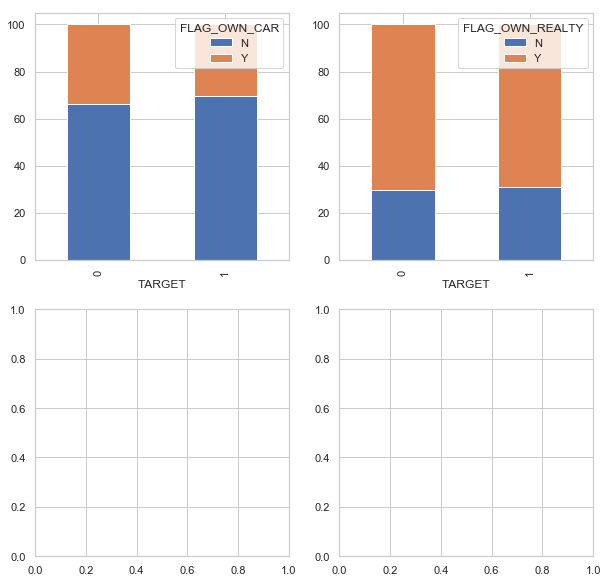

In [23]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

pd.crosstab(df_train['TARGET'], df_train['FLAG_OWN_CAR']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][0],kind = 'bar', stacked = True)
pd.crosstab(df_train['TARGET'], df_train['FLAG_OWN_REALTY']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][1],kind = 'bar', stacked = True)

In [25]:
df_train.groupby(['TARGET'])['AMT_GOODS_PRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,106170.0,572584.127988,392372.368414,45000.0,247500.0,454500.0,742500.0,4050000.0
1,7713.0,519557.995916,330614.263255,45000.0,252000.0,450000.0,675000.0,2254500.0


In [26]:
df_train.groupby(['TARGET'])['AMT_ANNUITY'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,106170.0,28220.704959,15193.716602,2052.0,17023.5,25825.5,36279.0,258025.5
1,7713.0,27245.938740,12721.849949,2722.5,17905.5,25843.5,34582.5,149211.0


In [27]:
df_train.groupby(['TARGET'])['EXT_SOURCE_2'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,106170.0,0.548570,0.179179,0.000001,0.453522,0.598264,0.683999,0.85500
1,7713.0,0.445559,0.211359,0.000038,0.273572,0.489168,0.621567,0.81187


In [28]:
df_train.groupby(['TARGET'])['EXT_SOURCE_3'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,106170.0,0.521652,0.190424,0.000527,0.387625,0.546023,0.673830,0.893976
1,7713.0,0.391945,0.207658,0.000527,0.220095,0.382502,0.553165,0.865896


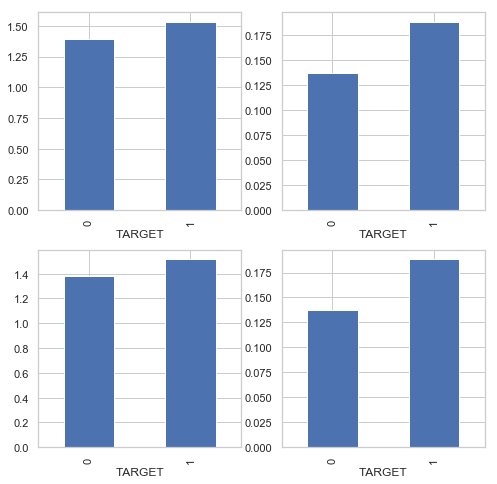

In [29]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))

df_train.groupby(['TARGET'])['OBS_30_CNT_SOCIAL_CIRCLE'].mean().plot(ax = axs[0][0], kind = 'bar')
df_train.groupby(['TARGET'])['DEF_30_CNT_SOCIAL_CIRCLE'].mean().plot(ax = axs[0][1], kind = 'bar')
df_train.groupby(['TARGET'])['OBS_60_CNT_SOCIAL_CIRCLE'].mean().plot(ax = axs[1][0], kind = 'bar')
df_train.groupby(['TARGET'])['DEF_30_CNT_SOCIAL_CIRCLE'].mean().plot(ax = axs[1][1], kind = 'bar')
plt.show()

In above chart, we see that the problematic applicants has higher mean of the number of social circle.

In [30]:
df_new = df_train[['AMT_CREDIT','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']]

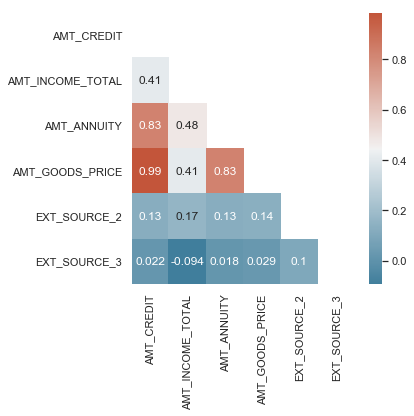

In [31]:
corr = df_new.corr('spearman')
f, ax = plt.subplots(figsize=(5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

It turns out that external source doesnt have a high correlation to income, credit etc. Meanwhile there's a high correlation between amount of goods price, annuity, credit and income total. So, we will choose columns `AMT_CREDIT`,`AMT_INCOME_TOTAL`,`AMT_ANNUITY`,`AMT_GOODS_PRICE`, and `NAME_INCOME_TYPE` 

In [32]:
df1 = df_train[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','TARGET']]

## Modelling

Before doing one-hot encoding, first i will do data resampling because there is a difference amount of 0 customers and 1 customers in the column `TARGET`.

In [33]:
df1['TARGET'].value_counts()

0    106170
1      7713
Name: TARGET, dtype: int64

In [34]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df1[(df1['TARGET']==0)] 
df_minority = df1[(df1['TARGET']==1)] 

#upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=106170, # to match majority class
                                 random_state=42)  # reproducible results

# downsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples=7713, # to match minority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

We will use these two dataframe and choose the data with best result in the end.

In [35]:
df_new1 = pd.get_dummies(df_upsampled)
df_new2 = pd.get_dummies(df_downsampled)

In [36]:
df_new1.head()

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
13,918468.0,225000.0,28966.5,697500.0,0,0,0,0,0,0,0,1
18,157500.0,112500.0,7875.0,157500.0,0,0,0,0,0,0,0,1
22,497520.0,450000.0,32521.5,450000.0,0,0,0,0,0,0,0,1
23,239850.0,83250.0,23850.0,225000.0,0,0,0,1,0,0,0,0
24,247500.0,135000.0,12703.5,247500.0,0,0,0,0,0,0,0,1


In [37]:
df_new2.head()

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
45575,728460.0,135000.0,38938.5,675000.0,0,0,0,0,0,1
2463,298512.0,90000.0,21762.0,270000.0,0,0,0,0,0,1
300364,139306.5,67500.0,13905.0,126000.0,0,0,1,0,0,0
222773,101880.0,90000.0,6939.0,90000.0,0,0,0,0,0,1
159239,225000.0,54000.0,12204.0,225000.0,0,0,1,0,0,0


### Logistic Regression

In [38]:
# defining feature matrix(X) and response vector(y)
X1 = df_new1.loc[:, df_new1.columns != 'TARGET']
y1 = df_new1["TARGET"]

X2 = df_new2.loc[:, df_new2.columns != 'TARGET']
y2 = df_new2["TARGET"]

In [39]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4,
                                                    random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4,
                                                    random_state=1)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr1 = lr.fit(X_train1, y_train1)

In [41]:
y_lr1 = lr1.predict(X_test1)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [42]:
lr2 = lr.fit(X_train2, y_train2)
y_lr2 = lr2.predict(X_test2)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [43]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train1,y_train1.ravel())

predictions = xgb_model.predict(X_test1)

In [44]:
xgb_model.fit(X_train2,y_train2.ravel())
predictions2 = xgb_model.predict(X_test2)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_lr1))
print(classification_report(y_test2, y_lr2))
print(classification_report(y_test1, predictions))
print(classification_report(y_test2, predictions2))

             precision    recall  f1-score   support

          0       0.55      0.50      0.53     42509
          1       0.54      0.59      0.57     42427

avg / total       0.55      0.55      0.55     84936

             precision    recall  f1-score   support

          0       0.56      0.57      0.56      3069
          1       0.57      0.56      0.56      3102

avg / total       0.56      0.56      0.56      6171

             precision    recall  f1-score   support

          0       0.72      0.67      0.70     42509
          1       0.69      0.74      0.72     42427

avg / total       0.71      0.71      0.71     84936

             precision    recall  f1-score   support

          0       0.58      0.57      0.57      3069
          1       0.58      0.58      0.58      3102

avg / total       0.58      0.58      0.58      6171



In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_lr1))
print(accuracy_score(y_test2, y_lr2))
print(accuracy_score(y_test1, predictions))
print(accuracy_score(y_test2, predictions2))

0.5480832626919092
0.563117809107114
0.7072972591127437
0.5773780586614812


### Conclusion

1. So, the best model is the XGBoost model with the upsampling data, with the accuracy 70%, precission, recall and f1 71%. But it is still a low number. The ways to improve this are to do hyperparameter tuning, or choose different predictors.

2. Several insights i gain from this data are
   a. Several occupations such as Accountant, Managers, HR, IT Staff have a low applications, despite of having the ability to make repayment and having high income. The company can make an advertisement for these particular occuppations.
   b. Male customers are decreasing as they aged. The company also can make an ad for people around 40-60 to make applications.